In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [3]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.05,
                    random_state=0,
                    factor=0.5)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])

df.head()

feature1  feature2
0  0.519781 -0.015981
1 -0.057719 -0.420279
2 -0.805155 -0.662227
3  0.316549  0.312730
4 -0.304804  0.407563

Scikit-learn ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îëê Í∞úÏùò ÎèôÏã¨Ïõê ÌòïÌÉúÎ•º Îù†Îäî 2Ï∞®Ïõê Î∂ÑÎ•ò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±

- make_circles: Îëê Í∞úÏùò ÌÅ¥ÎûòÏä§Í∞Ä Îëê Í∞úÏùò ÎèôÏã¨Ïõê ÌòïÌÉúÎ°ú Ìù©Ïñ¥Ï†∏ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±  
 Ïù¥Îäî ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂ÑÌï† Ïàò ÏóÜÎäî(non-linearly separable) ÎåÄÌëúÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞

    - X: ÏÉùÏÑ±Îêú ÌäπÏßï(Feature) Îç∞Ïù¥ÌÑ∞, 1000Í∞úÏùò ÌñâÍ≥º 2Í∞úÏùò Ïó¥(ÌäπÏßï1, ÌäπÏßï2)ÏùÑ Í∞ÄÏßÑ NumPy Î∞∞Ïó¥
    - y: Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïùò **Ï†ïÎãµ Î†àÏù¥Î∏î(Label)**, ÏïàÏ™Ω Ïõê ÎòêÎäî Î∞îÍπ•Ï™Ω ÏõêÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÌÅ¥ÎûòÏä§(0 ÎòêÎäî 1)Î°ú Íµ¨ÏÑ±Îêú NumPy Î∞∞Ïó¥

- noise=0.05: Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïóê ÏïΩÍ∞ÑÏùò Ïû°ÏùåÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ Ïõê Í≤ΩÍ≥ÑÎ•º Ï°∞Í∏à ÌùêÌä∏Îü¨Îú®Î¶º (ÎÖ∏Ïù¥Ï¶àÍ∞Ä 0Ïù¥Î©¥ ÏôÑÎ≤ΩÌïú Ïõê)

- factor=0.5: ÏïàÏ™Ω ÏõêÏùò Î∞òÏßÄÎ¶ÑÏù¥ Î∞îÍπ•Ï™Ω Ïõê Î∞òÏßÄÎ¶ÑÏùò 0.5Î∞∞Í∞Ä ÎêòÎèÑÎ°ù ÏÑ§Ï†ï

- feature1ÏùÄ xÏ¢åÌëú, feature2Îäî yÏ¢åÌëúÎ°ú Îã®ÏàúÌûà Îç∞Ïù¥ÌÑ∞ÏÖãÏùò 2Ï∞®Ïõê Í≥µÍ∞ÑÏóêÏÑú Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïùò ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÇ¥Îäî Í∞ÄÎ°ú Ï¢åÌëúÏôÄ ÏÑ∏Î°ú Ï¢åÌëúÏóê Î∂ôÏù∏ Ïù¥Î¶Ñ

In [4]:
# make_circles Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï§ëÏã¨ Ï¢åÌëú
data_center = np.mean(X, axis=0)    # axis=0ÏùÄ Í∞Å Ïó¥(feature)Ïóê ÎåÄÌïú ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞

print("Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌèâÍ∑† Ï§ëÏã¨ Ï¢åÌëú (feature1 ÌèâÍ∑†, feature2 ÌèâÍ∑†):")
print(data_center)

Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌèâÍ∑† Ï§ëÏã¨ Ï¢åÌëú (feature1 ÌèâÍ∑†, feature2 ÌèâÍ∑†):
[ 0.0006108  -0.00062919]


- ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ(Íµ∞ÏßëÌôî)ÏùÑ ÏàòÌñâÌïòÏßÄ ÏïäÏïòÏúºÎØÄÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤¥Ïùò Ï§ëÏã¨ÏùÑ Íµ¨Ìï®

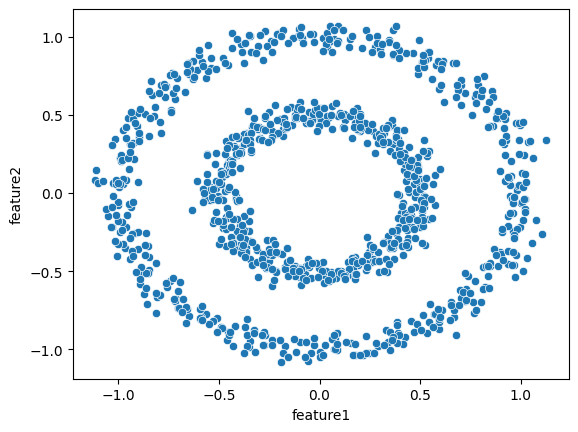

In [5]:
sns.scatterplot(data=df, x='feature1', y='feature2')
plt.show()

- make_circles Ìï®ÏàòÎäî Í∞ÄÏû• ÌÅ∞ ÏõêÏùò Î∞òÏßÄÎ¶ÑÏùÑ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú $r=1$Î°ú Í∞ÄÏ†ïÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ± (Ï§ëÏã¨Ïù¥ ÏõêÏ†ê 0,0Ïóê ÏúÑÏπò)
    - Ï¶â, Ïù¥ Ïõê ÏúÑÏùò Ï†êÎì§Ïùò $x$ Ï¢åÌëú(feature1)ÏôÄ $y$ Ï¢åÌëú(feature2)Îäî ÏµúÏÜå **$-1$**ÏóêÏÑú ÏµúÎåÄ $1$ ÏÇ¨Ïù¥Ïóê Î∂ÑÌè¨

- factor = 0.5Î°ú ÏÑ§Ï†ïÌï¥ÏÑú ÏïàÏ™Ω ÏõêÏùò Î∞òÏßÄÎ¶ÑÏùÄ Î∞îÍπ•Ï™Ω ÏõêÏùò Î∞òÏßÄÎ¶ÑÏùò 0.5Î∞∞, Ï¶â $r=0.5$
    - Ï¶â, Ïù¥ Ïõê ÏúÑÏùò Ï†êÎì§Ïùò $x$ Ï¢åÌëú(feature1)ÏôÄ $y$ Ï¢åÌëú(feature2)Îäî ÏµúÏÜå **$-0.5$**ÏóêÏÑú ÏµúÎåÄ $0.5$ ÏÇ¨Ïù¥Ïóê Î∂ÑÌè¨

- noise=0.05Î•º ÏÑ§Ï†ïÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Í∑πÌûà ÏùºÎ∂Ä Ï†êÏùÄ $-1$ÏùÑ ÏïÑÏ£º ÏÇ¥Ïßù Î∞ëÎèåÍ±∞ÎÇò $1$ÏùÑ ÏïÑÏ£º ÏÇ¥Ïßù ÎÑòÍ∏∏ ÏàòÎäî ÏûàÏùå

### k-means clustering

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, n_init='auto', random_state=0)
df['kmeans'] = km.fit_predict(X)

df.head()

feature1  feature2  kmeans
0  0.519781 -0.015981       0
1 -0.057719 -0.420279       0
2 -0.805155 -0.662227       1
3  0.316549  0.312730       0
4 -0.304804  0.407563       1

ÏõêÌòï Îç∞Ïù¥ÌÑ∞ÏÖãÏóê K-ÌèâÍ∑† Íµ∞ÏßëÌôî(K-Means Clustering) ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ï†ÅÏö©

- n_clusters=2: Îç∞Ïù¥ÌÑ∞Î•º 2Í∞úÏùò Íµ∞ÏßëÏúºÎ°ú ÎÇòÎàÑÎèÑÎ°ù ÏÑ§Ï†ï (Ïù¥Îäî Îëê Í∞úÏùò ÎèôÏã¨ÏõêÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏûêÏó∞Ïä§Îü¨Ïö¥ ÏÑ†ÌÉù)  
- n_init='auto': Ï¥àÍ∏∞ Ï§ëÏã¨Ï†ê ÏÑ§Ï†ïÏùÑ Ïó¨Îü¨ Î≤à Î∞òÎ≥µÌïòÎäî ÌöüÏàòÎ•º ÏûêÎèôÏúºÎ°ú ÏÑ§Ï†ï (Í≤ΩÍ≥† Î©îÏãúÏßÄÎ•º ÌîºÌïòÍ∏∞ ÏúÑÌï¥ ÏµúÏã† Î≤ÑÏ†ÑÏóêÏÑú Í∂åÏû•ÎêòÎäî ÏÑ§Ï†ï)  
- km.fit_predict(X): Î™®Îç∏ÏùÑ ÌäπÏßï Îç∞Ïù¥ÌÑ∞ XÏóê ÎåÄÌï¥ ÌïôÏäµ(fit) ÏãúÌÇ§Í≥†,    
        ÎèôÏãúÏóê Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Í∞Ä Ïñ¥Îñ§ Íµ∞Ïßë(0, 1)Ïóê ÏÜçÌïòÎäîÏßÄ ÏòàÏ∏°(predict)ÌïòÏó¨ Íµ∞Ïßë Î†àÏù¥Î∏îÏùÑ Î∞òÌôò

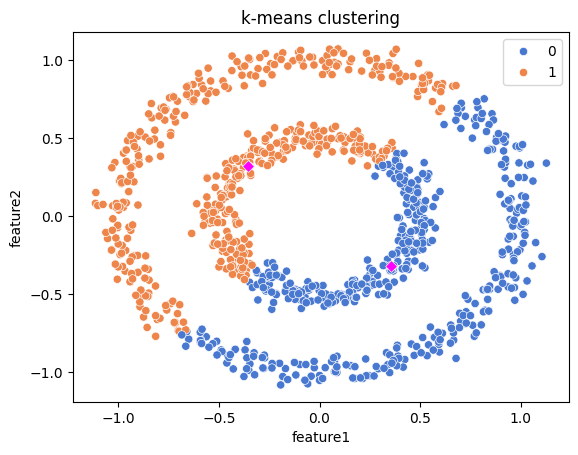

In [7]:
sns.scatterplot(df, x='feature1', y='feature2', hue='kmeans', palette='muted')      # Íµ∞ÏßëÌôî Í≤∞Í≥º ÏãúÍ∞ÅÌôî
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1],     # Íµ∞Ïßë Ï§ëÏã¨Ï†ê ÏãúÍ∞ÅÌôî
                marker='D', color='magenta')
plt.title('k-means clustering')
plt.show()

In [8]:
# K-Means Íµ∞ÏßëÌôî Î™®Îç∏Ïù¥ Í≥ÑÏÇ∞Ìïú Ï§ëÏã¨Ï†êÏùò Ï¢åÌëú
km.cluster_centers_

array([[ 0.35389106, -0.3196665 ],
       [-0.35693441,  0.32225967]])

- K-Means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÎäî ÏûòÎ™ªÎêú(Î∂ÄÏ†ÅÌï©Ìïú) Í≤∞Í≥º

üßê K-Means Í≤∞Í≥ºÍ∞Ä Î∂ÄÏ†ÅÌï©Ìïú Ïù¥Ïú†

K-MeansÎäî ÏõêÌòï(ÎπÑÎ≥ºÎ°ù) Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Î•º Ï†úÎåÄÎ°ú Ï≤òÎ¶¨ÌïòÏßÄ Î™ªÌïòÎäî, ÏïåÍ≥†Î¶¨Ï¶òÏùò **Í∑ºÎ≥∏Ï†ÅÏù∏ ÏïΩÏ†ê**ÏùÑ Î≥¥Ïó¨Ï§å

1. **Íµ∞ÏßëÏùò Ïã§Ï†ú Íµ¨Ï°∞**: Îç∞Ïù¥ÌÑ∞Îäî **ÏïàÏ™Ω Ïõê**Í≥º **Î∞îÍπ•Ï™Ω Ïõê**Ïù¥ÎùºÎäî Îëê Í∞úÏùò ÎèÖÎ¶ΩÎêú ÏõêÌòï Íµ∞ÏßëÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏùå

2. **K-MeansÏùò ÏûëÎèô Î∞©Ïãù**: K-MeansÎäî Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Î•º **Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨**Í∞Ä Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÏã¨Ï†ê(Centroid)Ïóê Ìï†Îãπ  
K-MeansÎäî Íµ∞ÏßëÏùò Î™®ÏñëÏùÑ **Íµ¨Ìòï(Spherical)**, Ï¶â **Î≥ºÎ°ùÌïú(Convex)** ÌòïÌÉúÎ°ú Í∞ÄÏ†ï

3. Í≤∞Í≥º: Í∑∏Î¶ºÏóêÏÑú Î≥º Ïàò ÏûàÎìØÏù¥, K-MeansÎäî Îëê Í∞úÏùò Ï§ëÏã¨Ï†êÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í≥µÍ∞ÑÏùÑ **ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÎÇòÎàÑÎäî Í≤ΩÌñ•**ÏùÑ Î≥¥ÏûÑ  
Í∑∏ Í≤∞Í≥º, ÏûëÏùÄ ÏõêÏù¥ Ï£ºÌô©ÏÉâÍ≥º ÌååÎûÄÏÉâÏúºÎ°ú Î∞òÎ∞ò ÎÇòÎâòÍ≥†, ÌÅ∞ Ïõê Ïó≠Ïãú Ï£ºÌô©ÏÉâÍ≥º ÌååÎûÄÏÉâÏúºÎ°ú Î∞òÎ∞ò ÎÇòÎâòÏñ¥  
 **ÏõêÎûòÏùò ÎèôÏã¨Ïõê Íµ¨Ï°∞(ÏïàÏ™Ω Ïõê vs. Î∞îÍπ•Ï™Ω Ïõê)**Î•º Ïù∏ÏãùÌïòÏßÄ Î™ªÌñàÏùå

Îî∞ÎùºÏÑú K-MeansÎäî **ÏàòÌïôÏ†ÅÏúºÎ°úÎäî Ï§ëÏã¨Ï†êÏùÑ Í≥ÑÏÇ∞**ÌñàÏßÄÎßå, **ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í¥ÄÏ†êÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Ï†ú Íµ∞Ïßë Íµ¨Ï°∞Î•º ÌååÏïÖÌïòÎäî Îç∞ Ïã§Ìå®**Ìï®
 
Í∑∏ ÎåÄÏïàÏúºÎ°ú Î∞ÄÎèÑ Í∏∞Î∞ò ÏïåÍ≥†Î¶¨Ï¶òÏù∏ DBSCANÏù¥ Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Îçî Ï†ÅÌï©Ìï®

### DBSCAN

- Î∞ÄÎèÑ Í∏∞Î∞ò Íµ∞ÏßëÌôî ÏïåÍ≥†Î¶¨Ï¶ò (K-MeansÎäî Í±∞Î¶¨ Í∏∞Î∞ò ÏïåÍ≥†Î¶¨Ï¶ò)
- Îç∞Ïù¥ÌÑ∞Ïùò Î∞ÄÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Íµ∞ÏßëÏùÑ Ï†ïÏùòÌïòÎ©∞, Ïû°Ïùå(Noise)Ïù¥ÎÇò ÌäπÏù¥Ï†ê(Outlier)ÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú Î∂ÑÎ¶¨Ìï¥ÎÇº Ïàò ÏûàÏùå

<br>

| ÌäπÏßï | ÏÑ§Î™Ö |
| :--- | :--- |
| **Î∞ÄÎèÑ Í∏∞Î∞ò** | Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Í∞Ä ÌäπÏ†ï Î∞ÄÎèÑ Ïù¥ÏÉÅÏúºÎ°ú Î™®Ïó¨ÏûàÎäî ÏòÅÏó≠ÏùÑ ÌïòÎÇòÏùò Íµ∞ÏßëÏúºÎ°ú Í∞ÑÏ£º |
| **Íµ∞Ïßë Í∞úÏàò Î∂àÌïÑÏöî** | K-MeansÏôÄ Îã¨Î¶¨, ÏÇ¨Ï†ÑÏóê Íµ∞ÏßëÏùò Í∞úÏàò($k$)Î•º ÏßÄÏ†ïÌï† ÌïÑÏöî ÏóÜÏùå <br> ÏïåÍ≥†Î¶¨Ï¶òÏù¥ ÏûêÎèôÏúºÎ°ú Î∞ÄÏßëÎêú ÏòÅÏó≠Ïùò Í∞úÏàòÎ•º Ï∞æÏïÑÎÉÑ |
| **Ïû°Ïùå Ï≤òÎ¶¨** | Î∞ÄÏßë ÏòÅÏó≠Ïóê ÏÜçÌïòÏßÄ ÏïäÎäî Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Î•º **Ïû°Ïùå(Noise)**ÏúºÎ°ú Î∂ÑÎ•ò |
| **ÏûÑÏùòÏùò ÌòïÌÉú** | ÏõêÌòïÏù¥ ÏïÑÎãå Îã¨ Î™®Ïñë(make_moons)Ïù¥ÎÇò Î≥µÏû°Ìïú ÌòïÌÉúÏùò Íµ∞ÏßëÎèÑ Ïûò Ï∞æÏïÑÎÉÑ <br> (Ïù¥Îäî ÎèôÏã¨Ïõê Îç∞Ïù¥ÌÑ∞Ïóê K-MeansÎ≥¥Îã§ Ïú†Î¶¨Ìï† Ïàò ÏûàÏùå) |

<br>

- Ï£ºÏöî ÌååÎùºÎØ∏ÌÑ∞
1. **Epsilon**: Ìïú Ï†êÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÌïòÎäî Î∞òÍ≤ΩÏùò ÌÅ¨Í∏∞

2. **MinPts**: ÎØºÌè¨Ïù∏Ìä∏, ÏûÖÏã§Î°† Ï£ºÎ≥Ä ÏòÅÏó≠ ÎÇ¥Ïóê Ìè¨Ìï®ÎêòÏñ¥Ïïº Ìï† ÏµúÏÜå Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ïàò (ÏûêÍ∏∞ÏûêÏã† Ìè¨Ìï®)

- DBSCANÏùò ÌïµÏã¨ Í∞úÎÖê ÏÑ∏ Í∞ÄÏßÄ
1. **ÌïµÏã¨ Ìè¨Ïù∏Ìä∏ (Core Point)**: ÌäπÏ†ï Î∞òÍ≤Ω $R$ (eps) ÎÇ¥Ïóê ÏµúÏÜå Í∞úÏàò $M$ (min_samples) Ïù¥ÏÉÅÏùò Ïù¥ÏõÉÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäî Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏

2. **Í≤ΩÍ≥Ñ Ìè¨Ïù∏Ìä∏ (Border Point)**: ÌïµÏã¨ Ìè¨Ïù∏Ìä∏Ïùò Î∞òÍ≤Ω ÎÇ¥Ïóê ÏûàÏßÄÎßå, Ïä§Ïä§Î°úÎäî ÌïµÏã¨ Ìè¨Ïù∏Ìä∏Í∞Ä ÏïÑÎãå Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏

3. **Ïû°Ïùå/ÌäπÏù¥Ï†ê (Noise Point)**: ÌïµÏã¨ Ìè¨Ïù∏Ìä∏ÎèÑ, Í≤ΩÍ≥Ñ Ìè¨Ïù∏Ìä∏ÎèÑ ÏïÑÎãå Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ (Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£º)

<br>

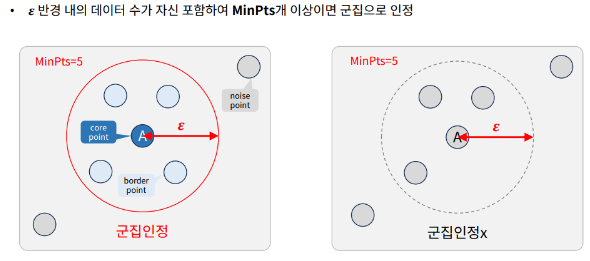

- ÏïåÍ≥†Î¶¨Ï¶ò ÏûëÎèô Î∞©Ïãù

1. ÏûÑÏùòÏùò Ìè¨Ïù∏Ìä∏ÏóêÏÑú ÏãúÏûëÌïòÏó¨ ÏûÖÏã§Î°† Î∞òÍ≤Ω ÎÇ¥Ïùò Ïù¥ÏõÉÏùÑ Ï∞æÏùå

2. Ïù¥ÏõÉÏùò ÏàòÍ∞Ä MinPts Ïù¥ÏÉÅÏù¥Î©¥ ÏÉàÎ°úÏö¥ ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÌòïÏÑ±

3. ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Î™®Îì† Ìè¨Ïù∏Ìä∏Ïóê ÎåÄÌï¥ Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌïòÏó¨ ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÌôïÏû•

4. Î™®Îì† Ìè¨Ïù∏Ìä∏Î•º Ï≤òÎ¶¨Ìï† ÎïåÍπåÏßÄ 1~3 Í≥ºÏ†ïÏùÑ Î∞òÎ≥µ

- Ïû•Ï†ê

1. ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàòÎ•º ÏÇ¨Ï†ÑÏóê ÏßÄÏ†ïÌï† ÌïÑÏöîÍ∞Ä ÏóÜÏùå

2. Î∂àÍ∑úÏπôÌïú Î™®ÏñëÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎèÑ Ï∞æÏïÑÎÉÑ

3. Ïù¥ÏÉÅÏπò(Noise)Î•º Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÏãùÎ≥Ñ

- ÌïúÍ≥Ñ

1. Î∞ÄÎèÑÍ∞Ä Îã§ÏñëÌïú(Î∞ÄÎèÑÍ∞Ä Ïò§Î∞ÄÏ°∞Î∞ÄÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ÏôÄ Îì¨ÏÑ±Îì¨ÏÑ±Ìïú ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Ìï®Íªò Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞) ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÍ∏∞ Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏùå

2. Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ÏÑ±Îä•Ïù¥ Ï†ÄÌïòÎê† Ïàò ÏûàÏùå

3. ÏûÖÏã§Î°†Í≥º MinPts ÌååÎùºÎØ∏ÌÑ∞ ÏÑ†ÌÉùÏóê Í≤∞Í≥ºÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®

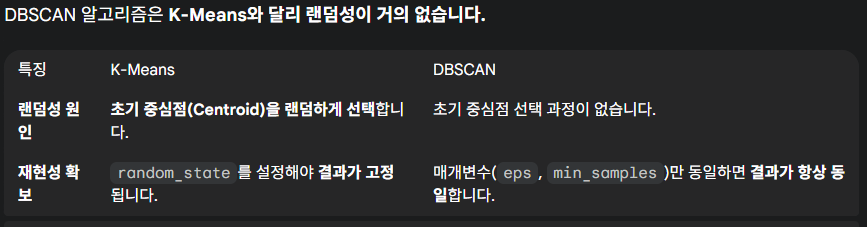

In [9]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,
                min_samples=10)
df['dbscan'] = dbscan.fit_predict(X)
df.head()

feature1  feature2  kmeans  dbscan
0  0.519781 -0.015981       0       0
1 -0.057719 -0.420279       0       0
2 -0.805155 -0.662227       1       1
3  0.316549  0.312730       0       0
4 -0.304804  0.407563       1       0

- eps=0.2: ÏµúÎåÄ Î∞òÍ≤Ω(Epsilon, $\epsilon$) ÏÑ§Ï†ï, Ìïú Ï†êÏùÑ Ï§ëÏã¨ÏúºÎ°ú Î∞òÍ≤Ω $0.2$ Ïù¥ÎÇ¥Ïùò Í±∞Î¶¨Ïóê ÏûàÎäî Ï†êÎì§ÏùÑ Ïù¥ÏõÉÏúºÎ°ú Í∞ÑÏ£º  
 (Ïù¥ Í∞íÏù¥ Íµ∞ÏßëÏùò Î∞ÄÎèÑÎ•º Í≤∞Ï†ïÌïòÎäî Ï§ëÏöîÌïú Í∏∞Ï§ÄÏù¥ Îê®)
 
- min_samples=10: ÏµúÏÜå Ïù¥ÏõÉ Í∞úÏàò(M) ÏÑ§Ï†ï, Î∞òÍ≤Ω $0.2$ ÎÇ¥Ïóê ÏµúÏÜåÌïú 10Í∞ú Ïù¥ÏÉÅÏùò Ïù¥ÏõÉÏù¥ ÏûàÏñ¥Ïïº Ìï¥Îãπ Ï†êÏù¥ ÌïµÏã¨ Ìè¨Ïù∏Ìä∏Î°ú Í∞ÑÏ£º

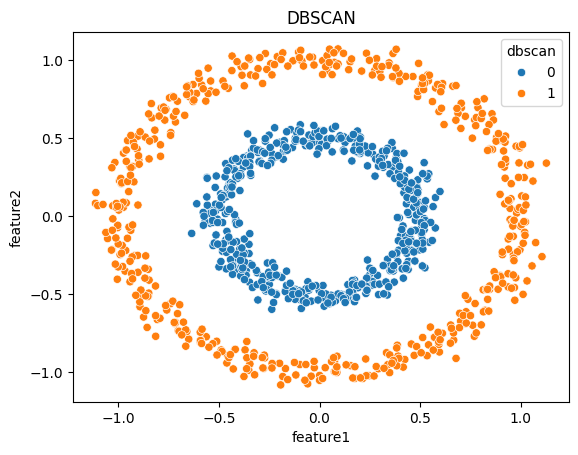

In [10]:
sns.scatterplot(df, x='feature1', y='feature2', hue='dbscan')
plt.title('DBSCAN')
plt.show()

- DBSCANÏùÄ K-MeansÏôÄÎäî Îã§Î•¥Í≤å Î™ÖÌôïÌïú Íµ∞Ïßë Ï§ëÏã¨Ï†ê(Centroid)ÏùÑ Í≥ÑÏÇ∞ÌïòÏßÄ ÏïäÏùå

- DBSCANÏùÄ Î∞ÄÎèÑ Í∏∞Î∞ò Íµ∞ÏßëÏù¥ÎØÄÎ°ú ÌïµÏã¨ Ìè¨Ïù∏Ìä∏, Í≤ΩÍ≥Ñ Ìè¨Ïù∏Ìä∏, Ïû°ÏùåÏúºÎ°ú Î∂ÑÎ•òÌï† Îøê ÌäπÏ†ï ÏßÄÏ†êÏùÑ ÎåÄÌëú Ï§ëÏã¨Ï†êÏúºÎ°ú ÎΩëÏïÑÎÇ¥ÏßÄÎäî ÏïäÏùå

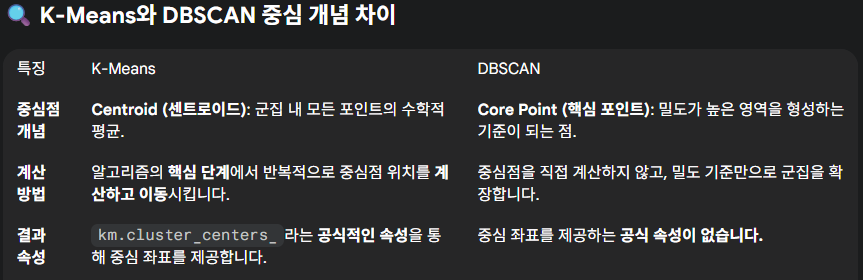

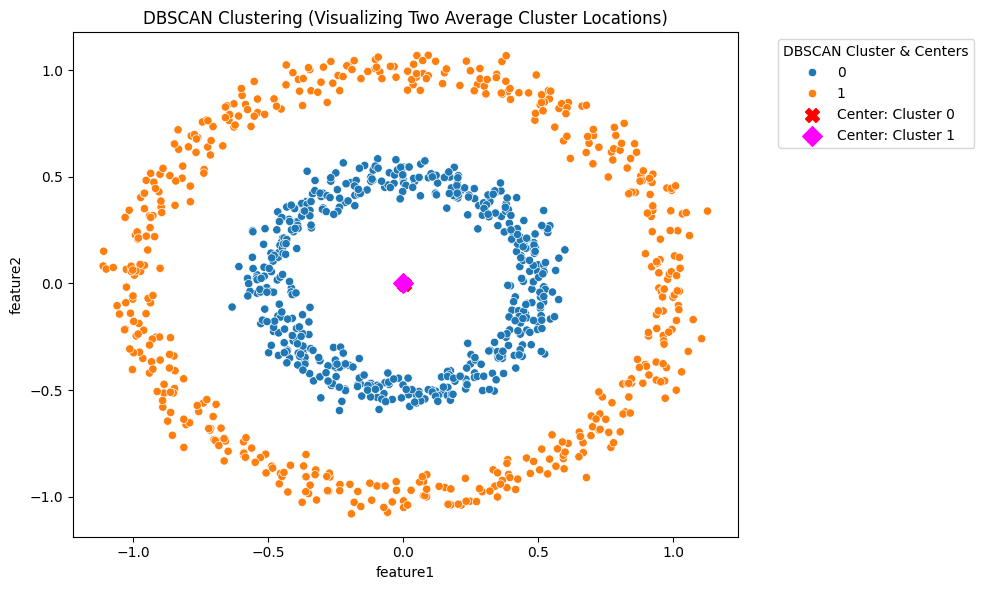

In [11]:
# ÏûÑÏùòÎ°ú DBSCANÏùò Í∞Å Íµ∞ÏßëÏóê ÏÜçÌïú Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îì§Ïùò Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑† Ï¢åÌëú ÏãúÍ∞ÅÌôî

# 1. Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ ÏãúÍ∞ÅÌôî (Hue: dbscan Î†àÏù¥Î∏î)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='feature1', y='feature2', hue='dbscan')

# 2. Í∞Å Íµ∞ÏßëÏùò ÌèâÍ∑† ÏúÑÏπò Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
unique_labels = df['dbscan'].unique()   # Ï§ëÎ≥µÎêòÏßÄ ÏïäÎäî Î™®Îì† Í∞í(Í≥†Ïú†Ìïú Î†àÏù¥Î∏î)Îßå Í∞ÄÏ†∏Ïò¥

# Íµ∞Ïßë ÎßàÏª§ Ïä§ÌÉÄÏùº Ï†ïÏùò
markers = ['X', 'D'] # Íµ∞Ïßë 0, Íµ∞Ïßë 1Ïóê ÏÇ¨Ïö©Ìï† ÎßàÏª§ Î™®Ïñë
colors = ['red', 'magenta'] # Íµ∞Ïßë 0, Íµ∞Ïßë 1Ïóê ÏÇ¨Ïö©Ìï† ÎßàÏª§ ÏÉâÏÉÅ

marker_index = 0
for label in unique_labels:     # Î∞òÎ≥µÎ¨∏Ïù¥ ÏóÜÏúºÎ©¥, Ïö∞Î¶¨Í∞Ä Î™á Í∞úÏùò Íµ∞ÏßëÏù¥ ÏÉùÍ≤ºÎäî ÏßÄ Ïïå Ïàò ÏóÜÏùå, Í∞Å Íµ∞ÏßëÎ≥ÑÎ°ú Ï†ïÌôïÌûà ÌèâÍ∑† ÏúÑÏπò Í≥ÑÏÇ∞
    if label == -1: 
        continue # Ïû°Ïùå(-1)ÏùÄ Ï†úÏô∏
    
    # Ìï¥Îãπ Íµ∞ÏßëÏóê ÏÜçÌïòÎäî Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îßå ÏÑ†ÌÉù
    cluster_points = df[df['dbscan'] == label]
    
    # ÌèâÍ∑† Ï¢åÌëú Í≥ÑÏÇ∞
    cluster_center = np.mean(cluster_points[['feature1', 'feature2']], axis=0)
    
    # Í≥ÑÏÇ∞Îêú ÌèâÍ∑† ÏúÑÏπòÎ•º Î≥ÑÎèÑÏùò ÎßàÏª§Î°ú ÏãúÍ∞ÅÌôî
    plt.scatter(cluster_center['feature1'], cluster_center['feature2'], 
                marker=markers[marker_index], # Íµ∞ÏßëÎ≥ÑÎ°ú Îã§Î•∏ ÎßàÏª§ ÏÇ¨Ïö©
                s=100,      # ÎßàÏª§ ÌÅ¨Í∏∞Î•º ÌÅ¨Í≤å ÏÑ§Ï†ï
                color=colors[marker_index], 
                label=f'Center: Cluster {label}') # Î≤îÎ°ÄÏóê ÌëúÏãúÎê† Ïù¥Î¶Ñ ÏßÄÏ†ï
    
    marker_index += 1 # Îã§Ïùå Íµ∞ÏßëÏùÑ ÏúÑÌï¥ ÎßàÏª§/ÏÉâÏÉÅ Ïù∏Îç±Ïä§ Ï¶ùÍ∞Ä

# 3. Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î∞è Ï∂úÎ†•
plt.title('DBSCAN Clustering (Visualizing Two Average Cluster Locations)')
plt.xlabel('feature1')
plt.ylabel('feature2')
# loc='upper left'Î°ú ÏÑ§Ï†ïÌïòÍ≥†, bbox_to_anchorÎ°ú ÏúÑÏπòÎ•º Ï°∞Ï†ïÌïòÏó¨ Í≤πÏπòÏßÄ ÏïäÍ≤å Ìï©ÎãàÎã§.
plt.legend(title='DBSCAN Cluster & Centers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
# DBSCANÏùò Í∞Å Íµ∞ÏßëÏóê ÏÜçÌïú Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îì§Ïùò Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑† Ï¢åÌëú

unique_labels = df['dbscan'].unique()   # Ï§ëÎ≥µÎêòÏßÄ ÏïäÎäî Î™®Îì† Í∞í(Í≥†Ïú†Ìïú Î†àÏù¥Î∏î)Îßå Ï∂îÏ∂ú

for label in unique_labels:
    if label == -1:
        print(f"Î†àÏù¥Î∏î -1 (Ïû°Ïùå): ÌèâÍ∑† ÏúÑÏπòÎ•º Í≥ÑÏÇ∞ÌïòÏßÄ ÏïäÏùå")
        continue

    cluster_points = df[df['dbscan'] == label]
    
    # Ìï¥Îãπ Íµ∞ÏßëÏùò ÌèâÍ∑† Ï¢åÌëú Í≥ÑÏÇ∞
    cluster_center = np.mean(cluster_points[['feature1', 'feature2']], axis=0)
    
    # ÌèâÍ∑† ÏúÑÏπò Ï∂úÎ†• (2Í∞úÏùò Ï§ëÏã¨Ï†êÏù¥ Ï∂úÎ†•ÎêòÏñ¥Ïïº Ìï®)
    print(f"Íµ∞Ïßë {label}Ïùò ÌèâÍ∑† ÏúÑÏπò:")
    print(f"feature1: {cluster_center['feature1']:.4f}, feature2: {cluster_center['feature2']:.4f}")
    print("-" * 20)

Íµ∞Ïßë 0Ïùò ÌèâÍ∑† ÏúÑÏπò:
feature1: 0.0018, feature2: -0.0017
--------------------
Íµ∞Ïßë 1Ïùò ÌèâÍ∑† ÏúÑÏπò:
feature1: -0.0006, feature2: 0.0005
--------------------


DBSCANÏùÄ Î∞ÄÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Íµ∞ÏßëÏùÑ Ï∞æÏïòÍ∏∞ ÎïåÎ¨∏Ïóê, ÏïàÏ™Ω Ïõê Ï†ÑÏ≤¥ÏôÄ Î∞îÍπ•Ï™Ω Ïõê Ï†ÑÏ≤¥Î•º Í∞ÅÍ∞Å ÌïòÎÇòÏùò Ïò®Ï†ÑÌïú Íµ∞ÏßëÏúºÎ°ú Ï†ïÌôïÌïòÍ≤å Ïù∏ÏãùÌï®

Î∞îÍπ• Ïõê (Íµ∞Ïßë 1): Ï§ëÏã¨Ïù¥ $(0, 0)$ / ÏïàÏ™Ω Ïõê (Íµ∞Ïßë 0): Ï§ëÏã¨Ïù¥ $(0, 0)$

Îëê Íµ∞Ïßë Î™®Îëê ÏõêÏ†êÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÎåÄÏπ≠Ï†ÅÏù∏ ÎèÑÎÑõ(Ring) Î™®ÏñëÏúºÎ°ú Î∂ÑÌè¨Ìï®

Îî∞ÎùºÏÑú Í∞Å Íµ∞ÏßëÏóê ÏÜçÌïú Î™®Îì† Ï†êÎì§Ïùò ÌèâÍ∑† ÏúÑÏπòÎ•º Í≥ÑÏÇ∞ÌïòÎ©¥, Í∑∏ ÌèâÍ∑† ÏúÑÏπòÎäî Îëê Íµ∞Ïßë Î™®Îëê ÏõêÏ†ê $(0, 0)$Ïóê ÏàòÎ†¥